In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [3]:
cov_1 = np.array([[0.5, 1], 
                  [1, 1]])
cov_2 = np.array([[1.5, 2], 
                  [2, 0.1]])

In [4]:
d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
d_2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_8176\103381402.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\DELL 5410\AppData\Local\Temp\ipykernel_8176\103381402.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  d_2 = np.random.multivariate_normal(u_2, cov_2, 500)


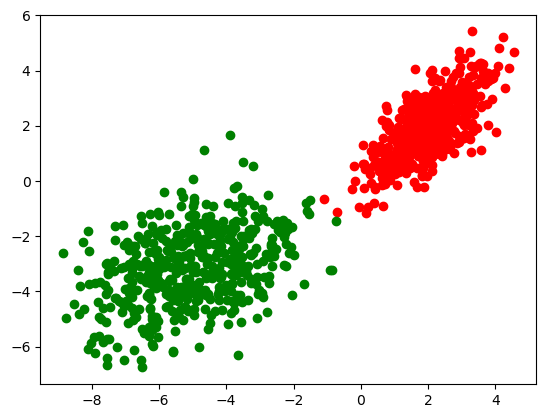

In [5]:
plt.scatter(d_1[:, 0], d_1[:, 1], color='red')
plt.scatter(d_2[:, 0], d_2[:, 1], color='green')

In [6]:
np.random.multivariate_normal?

In [7]:
dataset = np.ones((1000, 4))

In [8]:
dataset[:5]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
dataset[:500, 1:3] = d_1
dataset[500:, 1:3] = d_2

In [10]:
dataset[:5]

array([[1.        , 4.28051773, 3.38469833, 1.        ],
       [1.        , 3.30791804, 2.09527653, 1.        ],
       [1.        , 2.01668147, 2.21438437, 1.        ],
       [1.        , 1.83673468, 2.04012129, 1.        ],
       [1.        , 2.12299533, 0.36303627, 1.        ]])

In [11]:
dataset[:500, -1] = 0

In [12]:
dataset[:5]

array([[1.        , 4.28051773, 3.38469833, 0.        ],
       [1.        , 3.30791804, 2.09527653, 0.        ],
       [1.        , 2.01668147, 2.21438437, 0.        ],
       [1.        , 1.83673468, 2.04012129, 0.        ],
       [1.        , 2.12299533, 0.36303627, 0.        ]])

In [13]:
dataset[-5:]

array([[ 1.        , -5.00815495, -1.99328655,  1.        ],
       [ 1.        , -7.4426637 , -4.57948428,  1.        ],
       [ 1.        , -5.94286206, -1.77317851,  1.        ],
       [ 1.        , -5.07231375, -2.80304484,  1.        ],
       [ 1.        , -6.13661233, -3.5999059 ,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
dataset

array([[ 1.        , -3.5128819 , -3.06957327,  1.        ],
       [ 1.        , -4.97602953, -3.28422768,  1.        ],
       [ 1.        , -1.99911826, -2.66854334,  1.        ],
       ...,
       [ 1.        , -6.21582531, -4.89338023,  1.        ],
       [ 1.        , -4.18137128, -1.86128054,  1.        ],
       [ 1.        , -4.70559355, -4.10796054,  1.        ]])

In [16]:
X_train = dataset[:800, :-1]
Y_train = dataset[:800, -1]

X_test = dataset[800:, :-1]
Y_test = dataset[800:, -1]

In [17]:
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape

((200, 3), (200,), (800, 3), (800,))

In [18]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [19]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [20]:
random_values = np.linspace(-300, 300, 20)

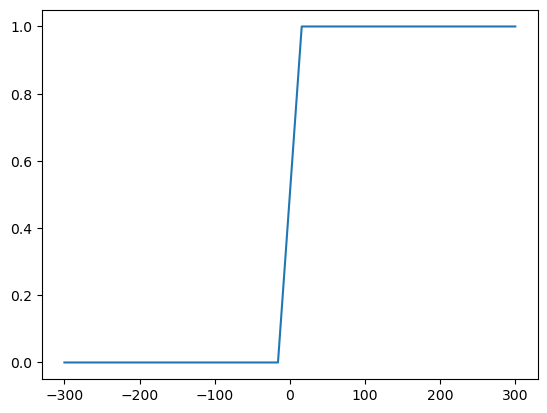

In [21]:
plt.plot(random_values, sigmoid(random_values))

In [22]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    loss = -1*(np.mean(Y*np.log(y_p) + (1 - Y)*np.log(1 - y_p)))
    
    return loss

In [23]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    
    grad = X.T@(Y - y_p)
    
    return grad/X.shape[0]

In [24]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    cost_epoch = []
    
    for i in range(epochs):
        print("The algo is on epoch no.:", i, end='\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    return theta, cost_epoch

In [25]:
Y_train = Y_train.reshape((-1, 1))
X_train.shape

(800, 3)

In [26]:
theta, cost = gradient_descent(X_train, Y_train, epochs=2000)

In [27]:
theta

array([[-0.26806528],
       [-0.91144805],
       [-0.6850301 ]])

In [28]:
cost[:10]

[0.6931471805599452,
 0.6789096709837646,
 0.6651764912053539,
 0.6519291637660513,
 0.6391495205614172,
 0.6268197549115674,
 0.6149224654382022,
 0.6034406922295903,
 0.5923579458397743,
 0.5816582297096492]

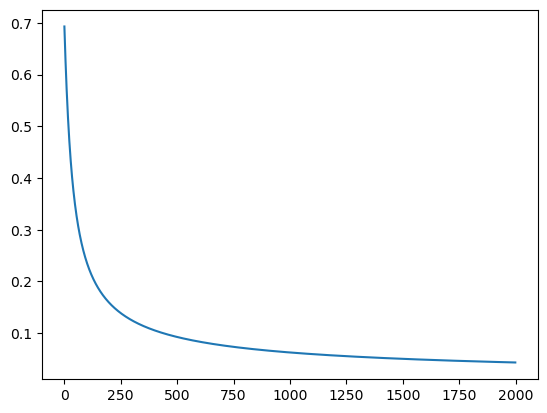

In [29]:
plt.plot(cost)

In [30]:
cost[-10:]

[0.04349442855886705,
 0.04348316498245481,
 0.04347191050641648,
 0.04346066511868804,
 0.04344942880722748,
 0.04343820156001482,
 0.043426983365052026,
 0.043415774210363,
 0.043404574083993445,
 0.04339338297401091]

In [31]:
Y_test = Y_test.reshape((-1, 1))
Y_test.shape

(200, 1)

In [32]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
    y_pred = []
    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    y_pred = np.array(y_pred)
    return y_pred

In [33]:
pred = predict(X_test, theta)

In [34]:
pred = pred.reshape((-1, 1))
pred.shape

(200, 1)

In [35]:
Y_test.shape

(200, 1)

In [36]:
for i in range(len(pred)):
    print(pred[i], Y_test[i])

[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [0.]
[0] [0.]
[0] [0.]
[0] [0.]
[1] [1.]
[1] [1.]
[0] [0.]
[0] [0.]
[

In [37]:
def accuracy(pred, label):
    temp = 0
    
    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [38]:
accuracy(pred, Y_test)

Accuracy = 99.5%


99.5